# Ex 1.5 Text Mining 

### 2. Import libraries 

In [2]:
# Import libraries

from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andymiller/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andymiller/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/andymiller/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 3. Load 20th Century data from Ex 1.4 

In [3]:
# Open the scraped text file

myfile = open('key_events_20th_century.txt', encoding='utf-8') 

In [4]:
# Import text file

with open('key_events_20th_century.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

### 4. Tokenize words 

In [5]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Jump to contentMain menuSearchDonateCreate accountLog inContents hide(Top)Historic events in the 20th centuryToggle Historic events in the 20th century subsectionSee alsoReferencesSourcesExternal linksKey events of the 20th century2 languagesArticleTalkReadEditView historyToolsAppearance hideFrom Wikipedia, the free encyclopediaThe 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.Historic events in the 20th century[edit]World at the beginning of the century[edit]Main article: Edwardian eraMap of colonial and land-based empires throughout the world in 1914The new beginning of the 20th century marked significant changes.", 'The 1900s saw the decade herald a se

In [6]:
# Apparently newer versions of NLTK split the data into two resurces and 
# nltk.download('punkt') wasn't enough.

In [7]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andymiller/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/andymiller/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
# Retry sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Jump to contentMain menuSearchDonateCreate accountLog inContents hide(Top)Historic events in the 20th centuryToggle Historic events in the 20th century subsectionSee alsoReferencesSourcesExternal linksKey events of the 20th century2 languagesArticleTalkReadEditView historyToolsAppearance hideFrom Wikipedia, the free encyclopediaThe 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.Historic events in the 20th century[edit]World at the beginning of the century[edit]Main article: Edwardian eraMap of colonial and land-based empires throughout the world in 1914The new beginning of the 20th century marked significant changes.", 'The 1900s saw the decade herald a se

In [9]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Jump', 'to', 'contentMain', 'menuSearchDonateCreate', 'accountLog', 'inContents', 'hide', '(', 'Top', ')', 'Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsectionSee', 'alsoReferencesSourcesExternal', 'linksKey', 'events', 'of', 'the', '20th', 'century2', 'languagesArticleTalkReadEditView', 'historyToolsAppearance', 'hideFrom', 'Wikipedia', ',', 'the', 'free', 'encyclopediaThe', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'centur

In [10]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4885 samples and 21400 outcomes>


In [11]:
dist_words.most_common(10)

[('.', 1323),
 ('the', 1125),
 (',', 983),
 ('of', 619),
 ('and', 411),
 ('to', 328),
 ('[', 309),
 (']', 309),
 ('in', 308),
 ('The', 302)]

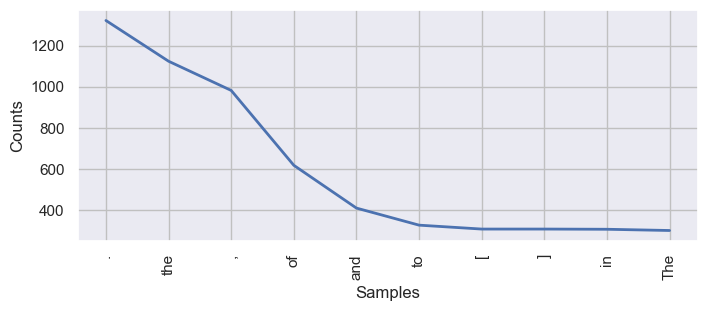

In [12]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

### 5. Remove stopwords and rerun the plot

In [13]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'theirs', "you'll", "weren't", 'can', 'me', 'should', 'doesn', "couldn't", 'over', 'ourselves', "you're", 'do', 'not', 'so', 'nor', 'as', 'i', "needn't", 'most', 's', 'under', 'ain', 'by', 'each', "it'd", "it's", 'this', 'himself', 'yourselves', "you've", 'it', 'now', 'll', 'mightn', 'than', 'in', 'm', 'but', 'shouldn', 'further', 'at', "shan't", 'here', 'what', 'weren', 'ours', 'both', "he's", 'up', 'into', 'themselves', 'an', "shouldn't", "they've", 'too', "he'll", "he'd", "we'd", 'any', 'when', 'will', 'hadn', 'o', 'being', 'having', 'above', 'has', 'its', "they'll", 'be', "i'm", 'needn', 'a', 'and', 'out', "won't", 'yours', "she'll", 'have', 'shan', 'from', 'whom', 'all', 'was', 'does', "i'd", 'these', 'until', 'just', 'wouldn', 'or', 'because', 'don', 'those', 'we', 'why', 'with', "we're", "hadn't", "mightn't", "we've", 'again', 'he', "mustn't", 'they', 'some', 'between', 'y', 'couldn', 'herself', 'once', 'same', 'them', "she's", 've', 'their', 'isn', 'hers', 'through', 'our', 'd

In [14]:
# Removing stopwords in sentences

filtered_sent = []
for word in tokenized_sent:
     if word not in stop_words:
         filtered_sent.append(word)
print("Tokenized Sentence:", tokenized_sent)
print("Filterd Sentence:", filtered_sent)

Tokenized Sentence: ['Jump to contentMain menuSearchDonateCreate accountLog inContents hide(Top)Historic events in the 20th centuryToggle Historic events in the 20th century subsectionSee alsoReferencesSourcesExternal linksKey events of the 20th century2 languagesArticleTalkReadEditView historyToolsAppearance hideFrom Wikipedia, the free encyclopediaThe 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.Historic events in the 20th century[edit]World at the beginning of the century[edit]Main article: Edwardian eraMap of colonial and land-based empires throughout the world in 1914The new beginning of the 20th century marked significant changes.", 'The 1900s saw th

In [15]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [16]:
filtered_words

['Jump',
 'contentMain',
 'menuSearchDonateCreate',
 'accountLog',
 'inContents',
 'hide',
 '(',
 'Top',
 ')',
 'Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsectionSee',
 'alsoReferencesSourcesExternal',
 'linksKey',
 'events',
 '20th',
 'century2',
 'languagesArticleTalkReadEditView',
 'historyToolsAppearance',
 'hideFrom',
 'Wikipedia',
 ',',
 'free',
 'encyclopediaThe',
 '20th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 ',',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space-based',
 'rockets',
 ',',
 'World',
 'Wide',
 'Web',
 'created',
 '.',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 "'",
 'lives',
 'shaped',
 '21st',
 'century',
 'today.Historic',
 'events',
 '20th',
 'century',
 '[',
 'edit',
 ']',
 'World',
 'beginning',
 'century',
 '[',
 'edit

In [17]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4781 samples and 16633 outcomes>


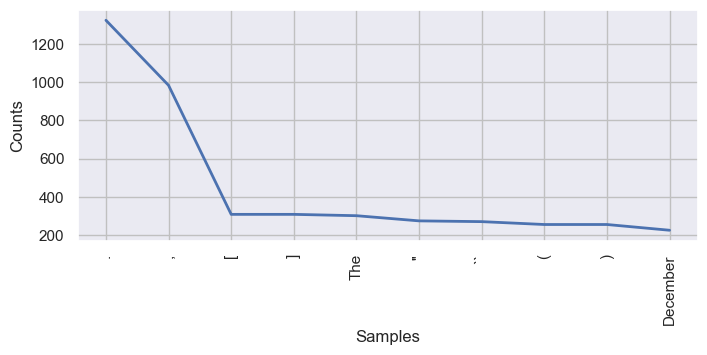

In [18]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [19]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [20]:
sans_punc

'  Jump    contentMain    menuSearchDonateCreate    accountLog    inContents    hide         Top         Historic    events      th    centuryToggle    Historic    events      th    century    subsectionSee    alsoReferencesSourcesExternal    linksKey    events      th    century     languagesArticleTalkReadEditView    historyToolsAppearance    hideFrom    Wikipedia         free    encyclopediaThe      th    century    changed    world    unprecedented    ways         The    World    Wars    sparked    tension    countries    led    creation    atomic    bombs         Cold    War    led    Space    Race    creation    space based    rockets         World    Wide    Web    created         These    advancements    played    significant    role    citizens         lives    shaped      st    century    today Historic    events      th    century         edit         World    beginning    century         edit         Main    article         Edwardian    eraMap    colonial    land based    e

In [21]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Jump', 'contentMain', 'menuSearchDonateCreate', 'accountLog', 'inContents', 'hide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsectionSee', 'alsoReferencesSourcesExternal', 'linksKey', 'events', 'th', 'century', 'languagesArticleTalkReadEditView', 'historyToolsAppearance', 'hideFrom', 'Wikipedia', 'free', 'encyclopediaThe', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'World', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'eraMap', 'colonial', 'land', 'based', 'empires', 'throughout', 'world', 'The', 'new', 'beginning', 'th', 'cent

In [22]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

In [23]:
dist_words_filter_2.most_common(20)

[('The', 313),
 ('December', 226),
 ('Retrieved', 208),
 ('War', 123),
 ('s', 103),
 ('war', 87),
 ('th', 85),
 ('World', 76),
 ('Soviet', 62),
 ('Hitler', 50),
 ('History', 42),
 ('Germany', 41),
 ('first', 41),
 ('ISBN', 40),
 ('world', 38),
 ('German', 35),
 ('would', 35),
 ('Japanese', 35),
 ('edit', 34),
 ('In', 34)]

In [24]:
new_stopwords = {'the', 's', 'th', 'isbn', 'edit', 'in','retrieved'}

# Filter tokens (case-insensitive)
filtered_tokens = [
    word for word in tokenized_word_2
    if word.lower() not in new_stopwords]


In [60]:
# Create a new frequency distribution
dist_words_filter_2 = FreqDist(filtered_tokens)

dist_words_filter_2.most_common(10)


[('December', 226),
 ('War', 123),
 ('war', 87),
 ('World', 76),
 ('Soviet', 62),
 ('Hitler', 50),
 ('History', 42),
 ('Germany', 41),
 ('first', 41),
 ('world', 38)]

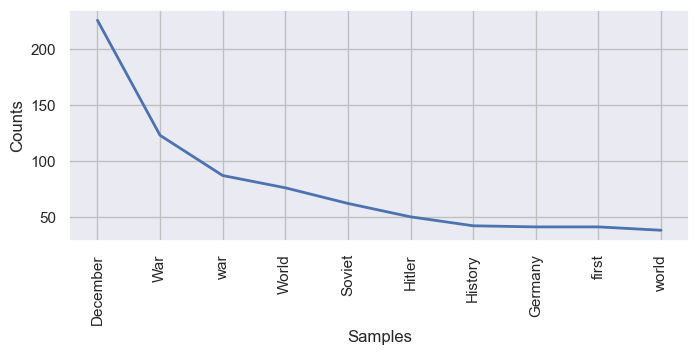

In [26]:
# Frequency Distribution Plot for 10 most common words (punctuation removed) 

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(10, cumulative = False)
plt.show()

In [27]:
# The task asks for a bar chart but the examples in the exercise were line graphs and it said this isn't important
# The instruction in the task then is ambiguous. 
# Apparently FreqDist.plot always makes a line graph and we need to use matplotlib or pandas for a bar chart.


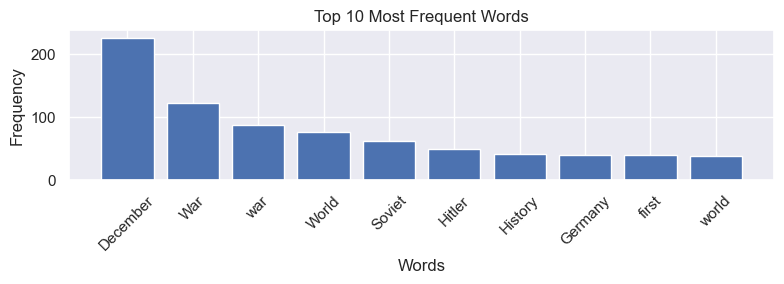

In [28]:
# Barchart using matplotlib

most_common = dist_words_filter_2.most_common(10)

words = [word for word, freq in most_common]
freqs = [freq for word, freq in most_common]

plt.figure(figsize=(8, 3))
plt.bar(words, freqs)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The first thing I notice is that 'War' and 'war' are counted as two different words as are 'World' and 'world' so that will need to be taken care of, maybe by making everything lower case before starting.  

What has changed from the previous plots is that once we get rid of all the common stop words and the punctuation, even with only the top 10 words (really we only have 8 here) you can already get a sense of the important events of the 20th Century being related to world wars, Soviets, Germany and Hitler.  

It was also interesting that December was the top word but then I realised that this is because many of the references on the page were retrieved in December 2018...so it's not that all the major events of the 20th Century occured in winter after all!  Maybe December needs to be included as a stop word the way I added "Retrieved" to the list but this would then remove the 4 instances of the word December that actually do occur in the text.  Could you advise what would be best in your feedback please?

### 6. Create a tags list using TextBlob 

In [61]:
dist_words_filter_2

FreqDist({'December': 226, 'War': 123, 'war': 87, 'World': 76, 'Soviet': 62, 'Hitler': 50, 'History': 42, 'Germany': 41, 'first': 41, 'world': 38, ...})

In [62]:
%%time
text = TextBlob(str(dist_words_filter_2))

CPU times: user 78 μs, sys: 0 ns, total: 78 μs
Wall time: 81.8 μs


In [63]:
text

TextBlob("<FreqDist with 4100 samples and 10207 outcomes>")

In [64]:
tags_list = text.tags

In [65]:
tags_list

[('<', 'JJ'),
 ('FreqDist', 'NN'),
 ('with', 'IN'),
 ('4100', 'CD'),
 ('samples', 'NNS'),
 ('and', 'CC'),
 ('10207', 'CD'),
 ('outcomes', 'NNS'),
 ('>', 'VBP')]

### 7. Create list of top 10 POS tags

In [75]:
# Make a string from the token list
text = TextBlob(" ".join(filtered_tokens))

In [76]:
# Get POS tags
tags_list = text.tags

In [77]:
tags_list

[('Jump', 'NNP'),
 ('contentMain', 'NN'),
 ('menuSearchDonateCreate', 'NN'),
 ('accountLog', 'NN'),
 ('inContents', 'NNS'),
 ('hide', 'VB'),
 ('Top', 'NNP'),
 ('Historic', 'NNP'),
 ('events', 'NNS'),
 ('centuryToggle', 'VBP'),
 ('Historic', 'NNP'),
 ('events', 'NNS'),
 ('century', 'NN'),
 ('subsectionSee', 'VBP'),
 ('alsoReferencesSourcesExternal', 'JJ'),
 ('linksKey', 'NN'),
 ('events', 'NNS'),
 ('century', 'NN'),
 ('languagesArticleTalkReadEditView', 'NN'),
 ('historyToolsAppearance', 'NN'),
 ('hideFrom', 'NN'),
 ('Wikipedia', 'NNP'),
 ('free', 'JJ'),
 ('encyclopediaThe', 'JJ'),
 ('century', 'NN'),
 ('changed', 'VBD'),
 ('world', 'NN'),
 ('unprecedented', 'JJ'),
 ('ways', 'NNS'),
 ('World', 'NNP'),
 ('Wars', 'NNP'),
 ('sparked', 'VBD'),
 ('tension', 'NN'),
 ('countries', 'NNS'),
 ('led', 'VBD'),
 ('creation', 'NN'),
 ('atomic', 'JJ'),
 ('bombs', 'NNS'),
 ('Cold', 'NNP'),
 ('War', 'NNP'),
 ('led', 'VBD'),
 ('Space', 'NNP'),
 ('Race', 'NNP'),
 ('creation', 'NN'),
 ('space', 'NN'),
 ('b

In [78]:
# Put into DataFrame
df_text = pd.DataFrame(tags_list, columns=['Words', 'Word type'])

In [81]:
df_text.head()

,Words,Word type
0,Jump,NNP
1,contentMain,NN
2,menuSearchDonateCreate,NN
3,accountLog,NN
4,inContents,NNS


In [82]:
# Group by word type
df_t = df_text.groupby('Word type').count().reset_index()

In [83]:
# Take top 10 POS tags
top10 = df_t.nlargest(10, 'Words')
print(top10)

   Word type  Words
11       NNP   4551
10        NN   1626
6         JJ   1120
13       NNS    677
22       VBD    608
16        RB    341
23       VBG    240
5         IN    183
25       VBP    160
24       VBN    138


### 8. Plot as bar chart using seaborn 

/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_89942/4166865528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Words", y = "Word type",


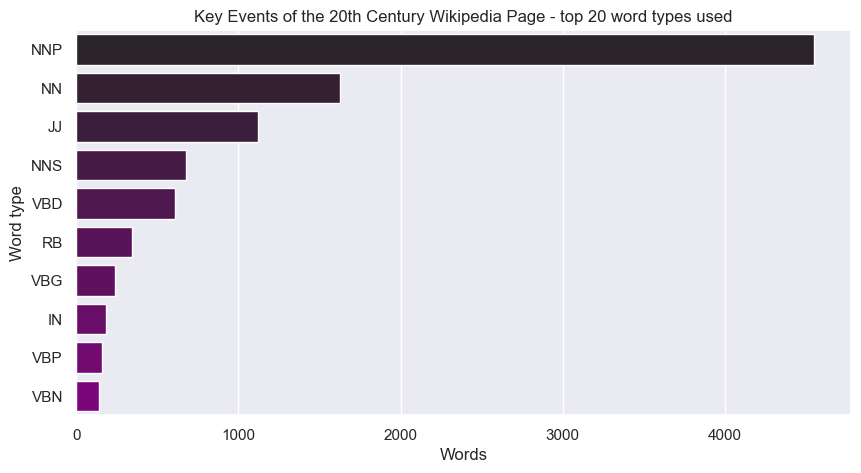

In [93]:
plt.figure(figsize = (10, 5))

sns.barplot(x = "Words", y = "Word type", 
            data = top10,
            palette=sns.dark_palette("Purple", n_colors=len(top10)),
            saturation=0.9)
           
plt.title("Key Events of the 20th Century Wikipedia Page - top 20 word types used")
plt.savefig('Top_20_word_types.png')
plt.show()

### 9. Bar charts for top 10 nouns, verbs and adjectives 

In [123]:
#  Noun codes start with NN, verb codes start with VB, adjective codes start with JJ 

In [124]:
# Take all nouns (NN, NNP, NNS)
df_nouns = df_text[df_text['Word type'].str.startswith('NN')]

df_nouns.head()

,Words,Word type
0,Jump,NNP
1,contentMain,NN
2,menuSearchDonateCreate,NN
3,accountLog,NN
4,inContents,NNS


In [125]:
# Group by word

df_nouns_grouped = df_nouns.groupby('Words').size().reset_index(name='frequency')

In [126]:
df_nouns_grouped.head()

,Words,frequency
0,A,23
1,AIDS,3
2,AMC,1
3,AS,1
4,Accords,1


In [127]:
# Take top 10 nouns:

top10_nouns = df_nouns_grouped.nlargest(10, 'frequency')
top10_nouns

,Words,frequency
377,December,226
1627,War,123
2749,war,87
1674,World,76
696,Hitler,50
694,History,42
1422,Soviet,42
616,Germany,41
2775,world,38
802,Japan,33


In [129]:
#  Repeat this for verbs

df_verbs = df_text[df_text['Word type'].str.startswith('VB')]  # Take only verbs (VB, VBD, VBG, VBN, VBP, VBZ)

df_verbs_grouped = df_verbs.groupby('Words').size().reset_index(name='frequency') # Group by word

top10_verbs = df_verbs_grouped.nlargest(10, 'frequency') # Take top 10

top10_verbs 

,Words,frequency
104,became,29
442,led,15
459,made,14
107,began,13
732,used,13
134,came,12
437,launched,12
395,including,10
433,known,9
185,controlled,8


In [130]:
#  Repeat this for adjectives

df_adjectives = df_text[df_text['Word type'].str.startswith('JJ')]  # Take only adjectives (JJ, JJR, JJS)

df_adjectives_grouped = df_adjectives.groupby('Words').size().reset_index(name='frequency') # Group by word

top10_adjectives = df_adjectives_grouped.nlargest(10, 'frequency') # Take top 10

top10_adjectives

,Words,frequency
23,German,27
30,Japanese,26
372,nuclear,26
364,new,23
54,Soviet,20
224,first,19
335,many,19
2,American,18
386,original,14
6,British,12


/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_89942/3746278976.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "frequency", y = "Words",


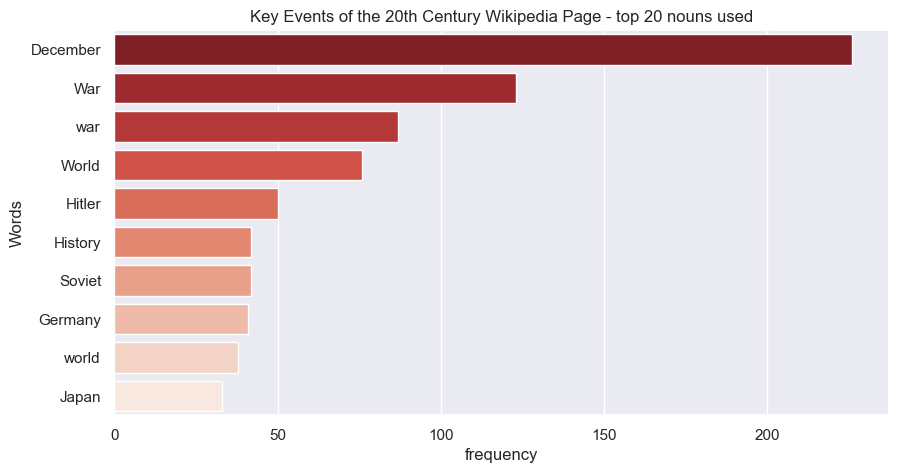

In [166]:
# Bar chart of top 10 nouns

plt.figure(figsize = (10, 5))

sns.barplot(x = "frequency", y = "Words", 
            data = top10_nouns,
             palette=sns.color_palette("Reds_r", n_colors=len(top10_nouns)),
             saturation=0.7)
           
plt.title("Key Events of the 20th Century Wikipedia Page - top 20 nouns used")
plt.savefig('Top_20_nouns.png')
plt.show()

/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_89942/1569978029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "frequency", y = "Words",


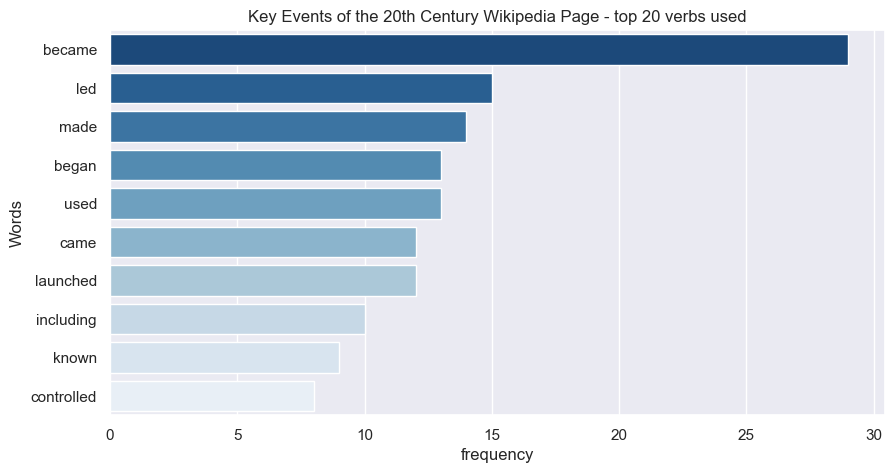

In [167]:
# Bar chart of top 10 verbs

plt.figure(figsize = (10, 5))

sns.barplot(x = "frequency", y = "Words", 
            data = top10_verbs,
            palette = sns.color_palette("Blues_r", n_colors=len(top10_nouns)),
             saturation=0.7)
           
plt.title("Key Events of the 20th Century Wikipedia Page - top 20 verbs used")
plt.savefig('Top_20_verbs.png')
plt.show()

/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_89942/638554362.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "frequency", y = "Words",


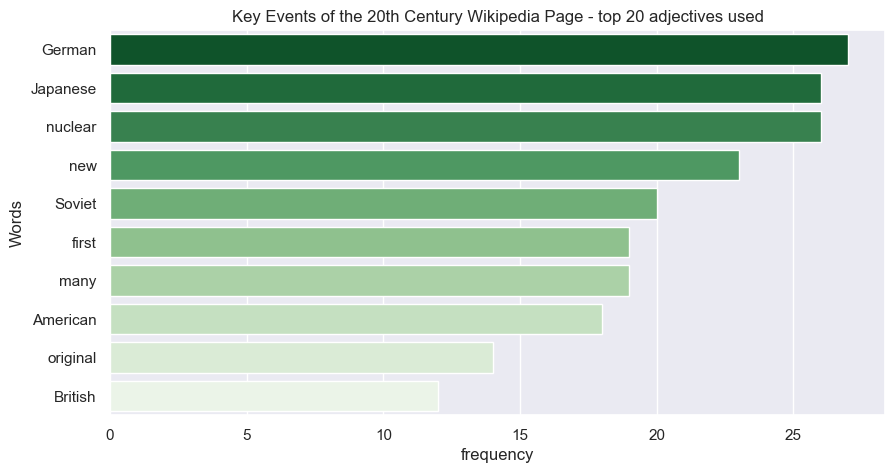

In [169]:
# Bar chart of top 10 adjectives

plt.figure(figsize = (10, 5))

sns.barplot(x = "frequency", y = "Words", 
            data = top10_adjectives,
            palette = sns.color_palette("Greens_r", n_colors=len(top10_nouns)),
             saturation=0.7)
           
plt.title("Key Events of the 20th Century Wikipedia Page - top 20 adjectives used")
plt.savefig('Top_20_adjectives.png')
plt.show()

#### Analysis

What stands out to me is that that so many of the words are related to conflict and geopolitics.  This suggests that the Wikipedia page frames the events of the 20th Century mainly through the lens of major warn and the political actors, most notable regarding World war II and its participants.

In the verbs list the verbs are very factual and largely neutral but again are associated with various aspects associated with conflict.  'became' and 'began' indicate change while 'led', 'controlled', 'launched' and 'used' likely relate to military action, control and power.

From the adjectives we see many national identifiers ('German', 'Japanese', 'Soviet', 'American', 'British'), again those associated with World War II as well as a few words that can relate to historical recounting such as 'first', 'original' and 'new'.  These adjectives suggest nation-centred view of historical events.

There is an absence of words relating to everyday life, civilians, culture or art.  This suggests that the Wikipedia page prioritizes geopolitical accomplishments over social or cultural developements.

### 10. Create data frame of Countries and frequency 

In [175]:
# For this I will use the country list that was provided since the one I scraped myself was different to this one

In [261]:
df_countries = pd.read_csv(('countries_list_20th_century_1.5.csv'), index_col = False)

In [262]:
df_countries.shape

(209, 2)

In [263]:
df_countries.head()

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [264]:
# Drop the 'Unnamed: 0 column'

df_countries.drop(columns=['Unnamed: 0'])

,country_name
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
204,Sahrawi Arab Democratic Republic
205,Somaliland
206,South Ossetia
207,Taiwan


In [265]:
# Remove spaces before and after country names

df_countries['country_name'] = df_countries['country_name'].str.strip()


In [266]:
# Some of the name are formatted in a way that won't allow them to be found in the text.
# Create a mapping of old names -> new names for the sake of counting them

replace_names = {
    'Korea, North': 'North Korea',
    'Korea, South': 'South Korea',
    "China, People's Republic of": 'China',
    'Bahamas, The': 'Bahamas',
    'Congo, Democratic Republic of the': 'Congo',
    'Congo, Republic of the': 'Congo',
    'Gambia, The':'Gambia',
    'Micronesia, Federated States of': 'Micronesia',
    'Vatican City (Holy See)': 'Vatican'}

# Apply the replacements
df_countries['country_name'] = df_countries['country_name'].replace(replace_names)


In [267]:
# Now add one space to the end of each country name.  This is for consistency, to stop words like 'Japanese' being counted as one mention 
# of Japan while the word 'French' would not count as one mention of 'France'.

df_countries['country_name'] = df_countries['country_name'] + " "

In [268]:
df_countries

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
...,...,...
204,205,Sahrawi Arab Democratic Republic
205,206,Somaliland
206,207,South Ossetia
207,208,Taiwan


In [269]:
# Change this to a list

country_list = df_countries['country_name'].to_list()

country_list

['Afghanistan ',
 'Albania ',
 'Algeria ',
 'Andorra ',
 'Angola ',
 'Antigua and Barbuda ',
 'Argentina ',
 'Armenia ',
 'Australia ',
 'Austria ',
 'Azerbaijan ',
 'Bahamas ',
 'Bahrain ',
 'Bangladesh ',
 'Barbados ',
 'Belarus ',
 'Belgium ',
 'Belize ',
 'Benin ',
 'Bhutan ',
 'Bolivia ',
 'Bosnia and Herzegovina ',
 'Botswana ',
 'Brazil ',
 'Brunei ',
 'Bulgaria ',
 'Burkina Faso ',
 'Burundi ',
 'Cambodia ',
 'Cameroon ',
 'Canada ',
 'Cape Verde ',
 'Central African Republic ',
 'Chad ',
 'Chile ',
 'China ',
 'Colombia ',
 'Comoros ',
 'Congo ',
 'Congo ',
 'Costa Rica ',
 'Croatia ',
 'Cuba ',
 'Cyprus ',
 'Czech Republic ',
 'Denmark ',
 'Djibouti ',
 'Dominica ',
 'Dominican Republic ',
 'East Timor ',
 'Ecuador ',
 'Egypt ',
 'El Salvador ',
 'Equatorial Guinea ',
 'Eritrea ',
 'Estonia ',
 'Eswatini ',
 'Ethiopia ',
 'Fiji ',
 'Finland ',
 'France ',
 'Gabon ',
 'Gambia ',
 'Georgia ',
 'Germany ',
 'Ghana ',
 'Greece ',
 'Grenada ',
 'Guatemala ',
 'Guinea ',
 'Guinea '

In [270]:
# We want to count how many times each country appears in filtered_tokens

In [271]:
filtered_tokens 

['Jump',
 'contentMain',
 'menuSearchDonateCreate',
 'accountLog',
 'inContents',
 'hide',
 'Top',
 'Historic',
 'events',
 'centuryToggle',
 'Historic',
 'events',
 'century',
 'subsectionSee',
 'alsoReferencesSourcesExternal',
 'linksKey',
 'events',
 'century',
 'languagesArticleTalkReadEditView',
 'historyToolsAppearance',
 'hideFrom',
 'Wikipedia',
 'free',
 'encyclopediaThe',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space',
 'based',
 'rockets',
 'World',
 'Wide',
 'Web',
 'created',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 'lives',
 'shaped',
 'st',
 'century',
 'today',
 'Historic',
 'events',
 'century',
 'World',
 'beginning',
 'century',
 'Main',
 'article',
 'Edwardian',
 'eraMap',
 'colonial',
 'land',
 'based',
 'empires',
 'throughout',
 'world',
 'new',
 'begi

In [272]:
# Change list to a string

listToStr = ' '.join([str(elem) for elem in filtered_tokens])
 
print(listToStr)

Jump contentMain menuSearchDonateCreate accountLog inContents hide Top Historic events centuryToggle Historic events century subsectionSee alsoReferencesSourcesExternal linksKey events century languagesArticleTalkReadEditView historyToolsAppearance hideFrom Wikipedia free encyclopediaThe century changed world unprecedented ways World Wars sparked tension countries led creation atomic bombs Cold War led Space Race creation space based rockets World Wide Web created These advancements played significant role citizens lives shaped st century today Historic events century World beginning century Main article Edwardian eraMap colonial land based empires throughout world new beginning century marked significant changes saw decade herald series inventions including automobile airplane radio broadcasting saw completion Panama Canal Scramble Africa continued resulted wars genocide across continent atrocities Congo Free State shocked civilized world From First World War aftermath caused major ch

In [274]:
country_counts = {country: listToStr.count(country) for country in country_list}

country_counts

{'Afghanistan ': 1,
 'Albania ': 2,
 'Algeria ': 1,
 'Andorra ': 0,
 'Angola ': 1,
 'Antigua and Barbuda ': 0,
 'Argentina ': 0,
 'Armenia ': 0,
 'Australia ': 2,
 'Austria ': 5,
 'Azerbaijan ': 0,
 'Bahamas ': 0,
 'Bahrain ': 0,
 'Bangladesh ': 2,
 'Barbados ': 0,
 'Belarus ': 1,
 'Belgium ': 2,
 'Belize ': 0,
 'Benin ': 0,
 'Bhutan ': 0,
 'Bolivia ': 0,
 'Bosnia and Herzegovina ': 0,
 'Botswana ': 0,
 'Brazil ': 0,
 'Brunei ': 0,
 'Bulgaria ': 1,
 'Burkina Faso ': 0,
 'Burundi ': 0,
 'Cambodia ': 2,
 'Cameroon ': 0,
 'Canada ': 2,
 'Cape Verde ': 1,
 'Central African Republic ': 0,
 'Chad ': 0,
 'Chile ': 0,
 'China ': 10,
 'Colombia ': 0,
 'Comoros ': 0,
 'Congo ': 2,
 'Costa Rica ': 0,
 'Croatia ': 0,
 'Cuba ': 3,
 'Cyprus ': 0,
 'Czech Republic ': 0,
 'Denmark ': 3,
 'Djibouti ': 0,
 'Dominica ': 0,
 'Dominican Republic ': 0,
 'East Timor ': 0,
 'Ecuador ': 0,
 'Egypt ': 2,
 'El Salvador ': 0,
 'Equatorial Guinea ': 0,
 'Eritrea ': 0,
 'Estonia ': 2,
 'Eswatini ': 0,
 'Ethiopia ':

In [277]:
# Create dataframe of results in decending order

df_country_counts = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Frequency'])
df_country_counts.sort_values(by='Frequency', ascending=False, inplace=True)
df_country_counts.head(30)

,Country,Frequency
63,Germany,41
84,Japan,33
184,United States,23
59,France,17
190,Vietnam,14
81,Italy,14
139,Poland,13
35,China,10
75,India,9
143,Russia,9


In [278]:
# Remove all the rows with frequency of 0

df_country_counts_trimmed = df_country_counts[df_country_counts['Frequency']>0]

df_country_counts_trimmed.shape

(67, 2)

/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_89942/557858036.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Frequency", y = "Country",


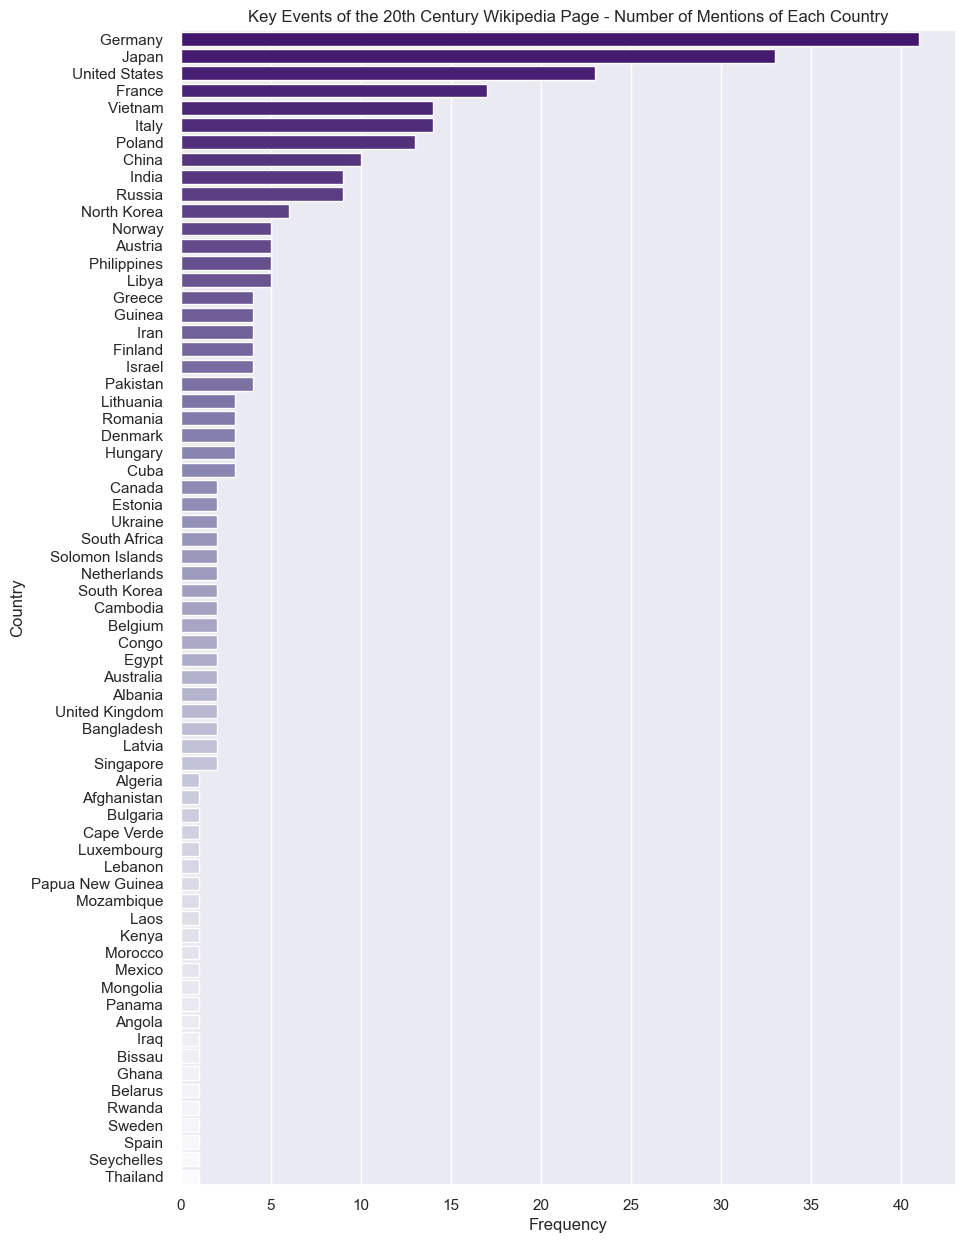

In [279]:
# Bar chart showing these results

plt.figure(figsize = (10, 15))

sns.barplot(x = "Frequency", y = "Country", 
            data = df_country_counts_trimmed,
            palette = sns.color_palette("Purples_r", n_colors=len(df_country_counts_trimmed)),
             saturation=0.7)
           
plt.title("Key Events of the 20th Century Wikipedia Page - Number of Mentions of Each Country")
plt.savefig('Country_mentions_bar.png')
plt.show()


Of the countries that were found, again the theme seems to be mostly conflict-related with the main actors in the two World Wars appearing the most times.  Vietnam is there too with 14 mentions, another country that faced significant conflict in the 20th Century along with Cuba with 9 mentions. Indeed all the countries that were in possession of nuclear weapons at any point during the 20th Century are in the top half of the list. These countries were United States, Russia, the United Kingdom, France and China, followed later by India, Pakistan, Israel and (briefly) South Africa.  All of these countries fundamentally altered global politics during the Cold War.





### Bonus Task - Sentiment Analysis

Before running the analysis, I would imagine that the sentiment will be fairly neutral since Wikipedia is supposed to relay facts without bias or opinion.  Despite the content being about a lot of negative events I suspect that the polarity score should be pretty close to 0 and the subjectivity score should also be close to 0 since this is a report of facts and not personal opinion.  Let's see...

In [284]:
# Calculate sentiment scores

text_sent = TextBlob(str(filtered_tokens))

In [286]:
print(text_sent.sentiment)

Sentiment(polarity=0.05022945717041188, subjectivity=0.3535771633447508)


As expected the polarity score which is measured on a scale from -1 to 1, was very close to zero indicating neither positive nor negative sentiment.

The subjectivity score, measured on a scale from 0 to 1 is also low which means that the text is more factual than opinion based.